<a href="https://colab.research.google.com/github/gaolinai8888/Pandas-Data-Science-Tasks/blob/master/severe_chronic_absenteeism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Identifying Predictors of Severe Chronic Absenteeism and Targeting Interventions for Attendance Improvement


In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [3]:
!pwd

/gdrive


In [4]:
!ls /gdrive/MyDrive/absence_data.csv

/gdrive/MyDrive/absence_data.csv


In [5]:
df = pd.read_csv('/gdrive/MyDrive/absence_data.csv')

## Part 1: Data Analysis

In [6]:
df.head()

,DT,ID,Sch,SiteName,Days Enr SY21_22,Days Present SY21_22,Days Abs SY21_22,Att Rate\n SY21_22,AttGrp\n SY21_22,Days Enr SY22_23,...,Special Ed,Cumulative Weighted Total GPA,Current Weighted Total GPA,ZipResidence,Contact Person 1 (Primary Contact),Contact Email 1 (Email of Contact Person 1),Contact Number 1 (Phone Number of Contact Person 1),Contact Person 2 (Secondary Contact),Contact Email 2 (Email of Contact Person 2),Contact Number 2 (Phone Number of Contact Person 2)
0,5/23/2024,277629,204,West Oakland Middle School,180,59,121,32.8%,Severe Chronic Absent,180.0,...,Not Special Ed,1.10,0.37,94607,YES,YES,YES,YES,YES,YES
1,5/23/2024,279268,204,West Oakland Middle School,180,168,12,93.3%,At Risk,67.0,...,Not Special Ed,3.27,3.72,94607,YES,YES,YES,NO,NO,NO
2,5/23/2024,279449,204,West Oakland Middle School,180,153,27,85.0%,Moderate Chronic Absent,180.0,...,Not Special Ed,2.64,2.99,94607,YES,NO,NO,YES,YES,NO
3,5/23/2024,279753,204,West Oakland Middle School,180,159,21,88.3%,Moderate Chronic Absent,180.0,...,Not Special Ed,2.82,3.13,94609,YES,NO,NO,YES,YES,YES
4,5/23/2024,279921,204,West Oakland Middle School,71,35,36,49.3%,Severe Chronic Absent,NaN,...,Not Special Ed,1.21,1.21,94609,YES,YES,NO,NO,NO,NO


In [7]:
# Select columns that are relevent
students = df.drop(['DT', 'Sch', 'SiteName'], axis = 1)

In [8]:
students.columns

Index(['ID', 'Days Enr SY21_22', 'Days Present SY21_22', 'Days Abs SY21_22',
       'Att Rate\n SY21_22', 'AttGrp\n SY21_22', 'Days Enr SY22_23',
       'Days Present SY22_23', 'Days Abs SY22_23', 'Att Rate\n SY22_23',
       'AttGrp\n SY22_23', 'Days Enr SY23_24', 'Days Present SY23_24',
       'Days Abs SY23_24', 'Att Rate\n SY23_24', 'AttGrp\n SY23_24',
       'Grade\nSY23_24', 'Gen', 'Ethnicity', 'Fluency', 'HomeLang',
       'SED Status', 'Special Ed', 'Cumulative Weighted Total GPA',
       'Current Weighted Total GPA', 'ZipResidence',
       'Contact Person 1 (Primary Contact)',
       'Contact Email 1 (Email of Contact Person 1)',
       'Contact Number 1 (Phone Number of Contact Person 1)',
       'Contact Person 2 (Secondary Contact)',
       'Contact Email 2 (Email of Contact Person 2)',
       'Contact Number 2 (Phone Number of Contact Person 2)'],
      dtype='object')

In [9]:
# Convert Strings to Floats
students['Att Rate\n SY21_22'] = students['Att Rate\n SY21_22'].str.rstrip('%').astype('float') / 100.0

In [10]:
students.dtypes

,0
ID,int64
Days Enr SY21_22,int64
Days Present SY21_22,int64
Days Abs SY21_22,int64
Att Rate\n SY21_22,float64
AttGrp\n SY21_22,object
Days Enr SY22_23,float64
Days Present SY22_23,float64
Days Abs SY22_23,float64
Att Rate\n SY22_23,object


In [11]:
students['Att Rate\n SY22_23'] = students['Att Rate\n SY22_23'].str.rstrip('%').astype('float') / 100.0
students['Att Rate\n SY23_24'] = students['Att Rate\n SY23_24'].str.rstrip('%').astype('float') / 100.0

In [12]:
att_rate = students[['Att Rate\n SY21_22', 'Att Rate\n SY22_23', 'Att Rate\n SY23_24']]
att_rate.head()

,Att Rate\n SY21_22,Att Rate\n SY22_23,Att Rate\n SY23_24
0,0.328,0.406,0.328
1,0.933,0.866,0.933
2,0.850,0.889,0.850
3,0.883,0.767,0.883
4,0.493,NaN,0.493


In [13]:
# Find the average attendence rate, ignoring NaN values
students['Average Att Rate'] = att_rate.mean(axis=1)


In [14]:
students['Severe Absent'] = np.where(students['Average Att Rate'] <= 0.80, 1, 0)

In [15]:
# Select relevent features
absence = students[['ID', 'Severe Absent', 'Grade\nSY23_24', 'Gen', 'Ethnicity', 'Fluency', 'HomeLang',
       'SED Status', 'Special Ed', 'Cumulative Weighted Total GPA','Current Weighted Total GPA']]

In [16]:
absence.round(2)

,ID,Severe Absent,Grade\nSY23_24,Gen,Ethnicity,Fluency,HomeLang,SED Status,Special Ed,Cumulative Weighted Total GPA,Current Weighted Total GPA
0,277629,1,8,M,African American,EO,English,SED,Not Special Ed,1.10,0.37
1,279268,0,8,F,White,RFEP,Arabic,SED,Not Special Ed,3.27,3.72
2,279449,0,8,F,White,RFEP,Arabic,SED,Not Special Ed,2.64,2.99
3,279753,0,7,M,Latino,EO,English,SED,Not Special Ed,2.82,3.13
4,279921,1,7,F,Latino,EO,English,SED,Not Special Ed,1.21,1.21
...,...,...,...,...,...,...,...,...,...,...,...
135,441023,1,8,M,African American,EO,English,SED,Not Special Ed,1.54,1.28
136,441922,1,6,M,African American,EO,English,SED,Not Special Ed,1.64,1.00
137,441945,0,8,F,White,EL,Other Lang,SED,Not Special Ed,3.06,3.30
138,441953,0,7,F,African American,EO,English,SED,Special Ed,2.25,2.20


In [17]:
absence.head()

,ID,Severe Absent,Grade\nSY23_24,Gen,Ethnicity,Fluency,HomeLang,SED Status,Special Ed,Cumulative Weighted Total GPA,Current Weighted Total GPA
0,277629,1,8,M,African American,EO,English,SED,Not Special Ed,1.10,0.37
1,279268,0,8,F,White,RFEP,Arabic,SED,Not Special Ed,3.27,3.72
2,279449,0,8,F,White,RFEP,Arabic,SED,Not Special Ed,2.64,2.99
3,279753,0,7,M,Latino,EO,English,SED,Not Special Ed,2.82,3.13
4,279921,1,7,F,Latino,EO,English,SED,Not Special Ed,1.21,1.21


###EDA

In [18]:
absence.describe()

,ID,Severe Absent,Grade\nSY23_24,Cumulative Weighted Total GPA,Current Weighted Total GPA
count,140.000000,140.000000,140.000000,140.000000,140.000000
mean,374800.585714,0.285714,7.042857,2.364500,2.190786
std,46073.940250,0.453376,0.785401,0.779302,0.901356
min,277629.000000,0.000000,6.000000,0.600000,0.320000
25%,371362.250000,0.000000,6.000000,1.815000,1.602500
50%,381165.500000,0.000000,7.000000,2.370000,2.140000
75%,399095.750000,1.000000,8.000000,2.942500,2.812500
max,442962.000000,1.000000,8.000000,3.970000,3.970000


In [19]:
absence.describe(include='object')

,Gen,Ethnicity,Fluency,HomeLang,SED Status,Special Ed
count,140,140,140,140,140,140
unique,2,7,4,10,2,2
top,M,African American,EO,English,SED,Not Special Ed
freq,76,71,84,84,137,101


In [20]:
absence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             140 non-null    int64  
 1   Severe Absent                  140 non-null    int64  
 2   Grade
SY23_24                  140 non-null    int64  
 3   Gen                            140 non-null    object 
 4   Ethnicity                      140 non-null    object 
 5   Fluency                        140 non-null    object 
 6   HomeLang                       140 non-null    object 
 7   SED Status                     140 non-null    object 
 8   Special Ed                     140 non-null    object 
 9   Cumulative Weighted Total GPA  140 non-null    float64
 10  Current Weighted Total GPA     140 non-null    float64
dtypes: float64(2), int64(3), object(6)
memory usage: 12.2+ KB


In [21]:
# Get a count of the number of students who are severe chronic absent
absence['Severe Absent'].value_counts()

,count
Severe Absent,
0,100
1,40


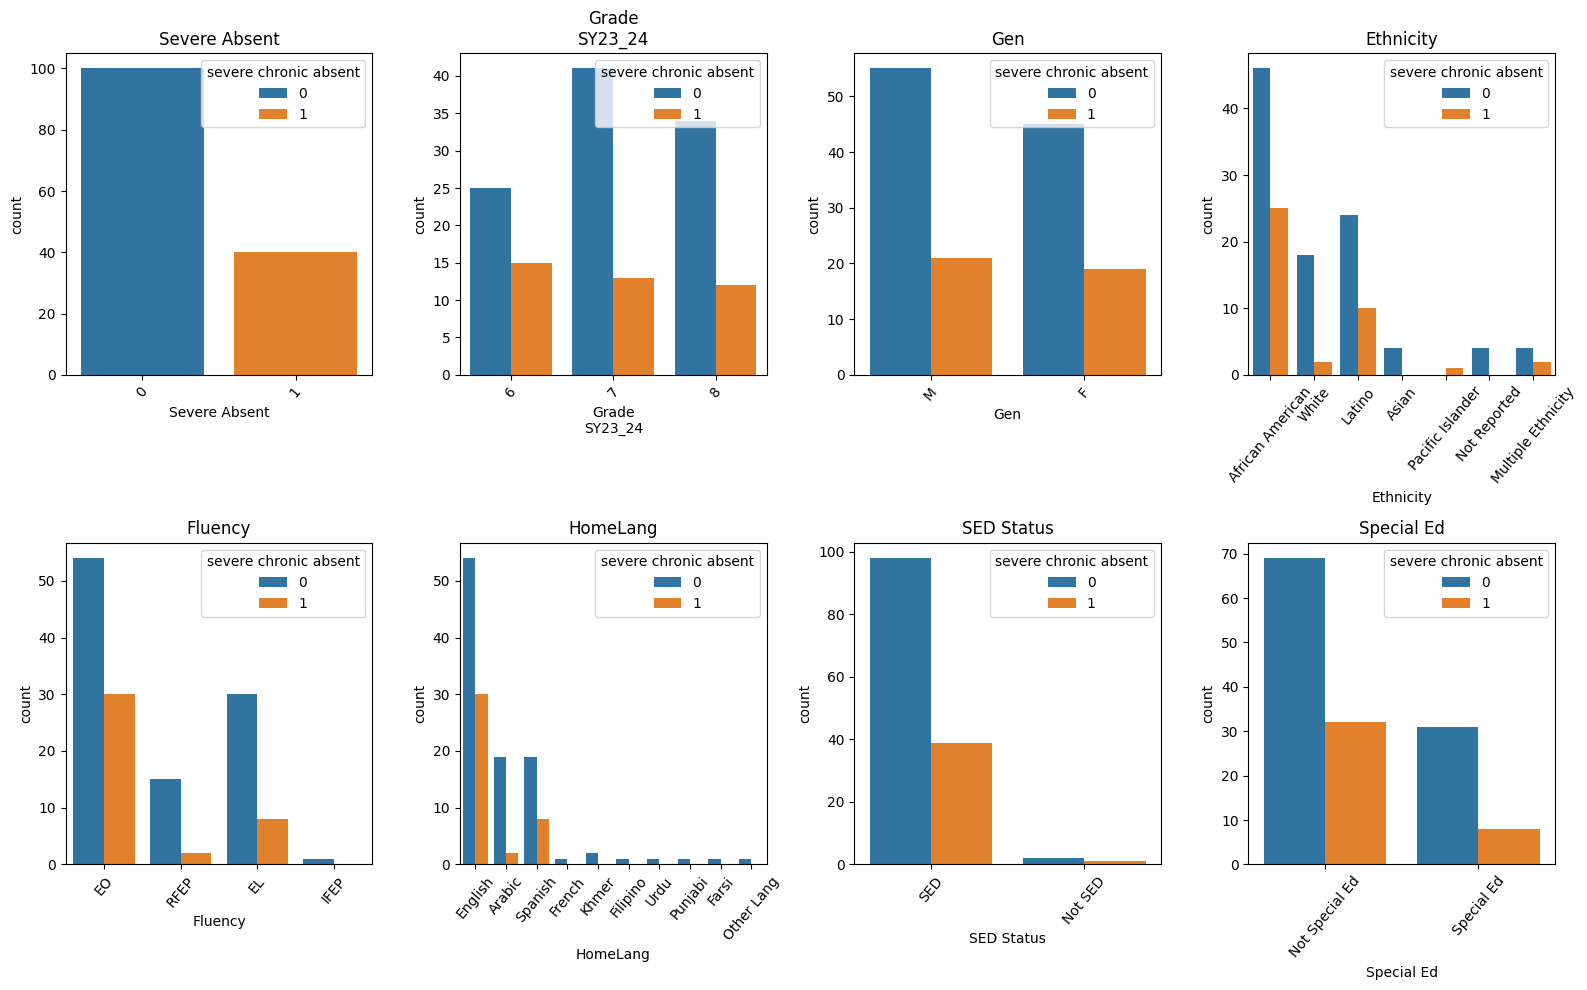

In [22]:
# Visualize the count of severe chronic absent student for different features
cols = ['Severe Absent', 'Grade\nSY23_24', 'Gen', 'Ethnicity', 'Fluency', 'HomeLang', 'SED Status', 'Special Ed']
n_rows = 2
n_cols = 4

# The subplot grid and figure size of each plot
fig, axs = plt.subplots(n_rows, n_cols, figsize = (n_cols * 4, n_rows * 5))


for r in range(0, n_rows):
  for c in range(0, n_cols):
    i = r*n_cols + c # index to go through the number of cols
    ax = axs[r][c] # Show where to position each subplot
    sns.countplot(data=absence, x=cols[i], hue ='Severe Absent', ax=ax)
    ax.set_title(cols[i])
    ax.tick_params(axis='x', labelrotation=50)
    ax.legend(title = 'severe chronic absent', loc = 'upper right')

plt.tight_layout()

In [23]:
absence.groupby(['Severe Absent', 'SED Status'], as_index=False).size()

,Severe Absent,SED Status,size
0,0,Not SED,2
1,0,SED,98
2,1,Not SED,1
3,1,SED,39


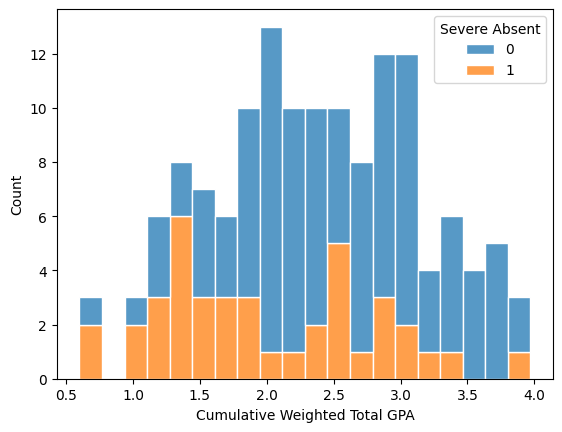

In [24]:
sns.histplot(data=absence, x="Cumulative Weighted Total GPA", hue ='Severe Absent', multiple='stack', edgecolor="white", bins=20);

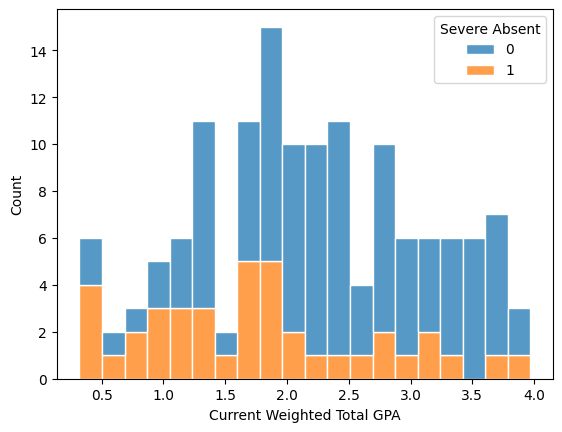

In [25]:
sns.histplot(data=absence, x="Current Weighted Total GPA", hue ='Severe Absent', multiple='stack', edgecolor="white", bins=20);

In [46]:
students.head()

,ID,Days Enr SY21_22,Days Present SY21_22,Days Abs SY21_22,Att Rate\n SY21_22,AttGrp\n SY21_22,Days Enr SY22_23,Days Present SY22_23,Days Abs SY22_23,Att Rate\n SY22_23,...,Current Weighted Total GPA,ZipResidence,Contact Person 1 (Primary Contact),Contact Email 1 (Email of Contact Person 1),Contact Number 1 (Phone Number of Contact Person 1),Contact Person 2 (Secondary Contact),Contact Email 2 (Email of Contact Person 2),Contact Number 2 (Phone Number of Contact Person 2),Average Att Rate,Severe Absent
0,277629,180,59,121,0.328,Severe Chronic Absent,180.0,73.0,107.0,0.406,...,0.37,94607,YES,YES,YES,YES,YES,YES,0.354000,1
1,279268,180,168,12,0.933,At Risk,67.0,58.0,9.0,0.866,...,3.72,94607,YES,YES,YES,NO,NO,NO,0.910667,0
2,279449,180,153,27,0.850,Moderate Chronic Absent,180.0,160.0,20.0,0.889,...,2.99,94607,YES,NO,NO,YES,YES,NO,0.863000,0
3,279753,180,159,21,0.883,Moderate Chronic Absent,180.0,138.0,42.0,0.767,...,3.13,94609,YES,NO,NO,YES,YES,YES,0.844333,0
4,279921,71,35,36,0.493,Severe Chronic Absent,NaN,NaN,NaN,NaN,...,1.21,94609,YES,YES,NO,NO,NO,NO,0.493000,1


In [49]:
# Correlation Matrix
corr = students[['Average Att Rate', 'Current Weighted Total GPA', 'Cumulative Weighted Total GPA']].corr().round(2)
corr

,Average Att Rate,Current Weighted Total GPA,Cumulative Weighted Total GPA
Average Att Rate,1.00,0.45,0.47
Current Weighted Total GPA,0.45,1.00,0.91
Cumulative Weighted Total GPA,0.47,0.91,1.00


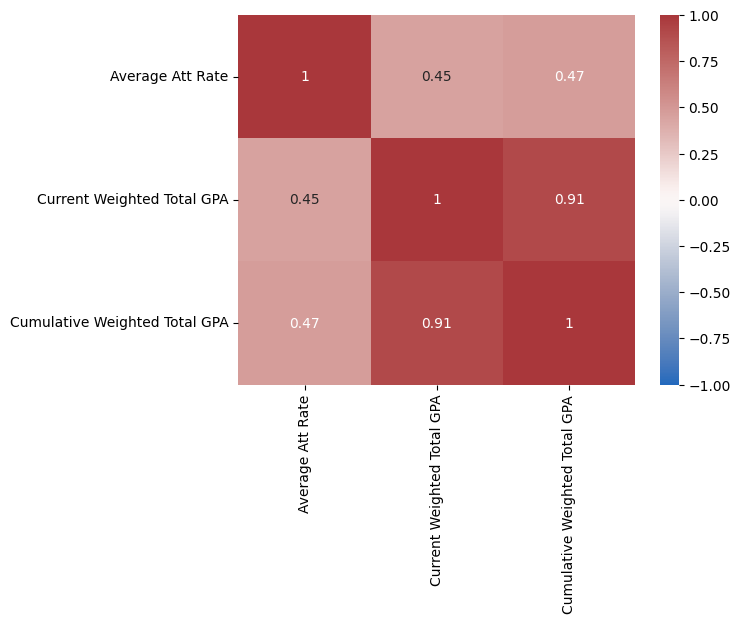

In [52]:
sns.heatmap(corr, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

In [26]:
# Select relevent features
absence2 = absence[['Severe Absent', 'Ethnicity', 'Fluency', 'HomeLang', 'Special Ed', 'Current Weighted Total GPA']]
absence2.head()

,Severe Absent,Ethnicity,Fluency,HomeLang,Special Ed,Current Weighted Total GPA
0,1,African American,EO,English,Not Special Ed,0.37
1,0,White,RFEP,Arabic,Not Special Ed,3.72
2,0,White,RFEP,Arabic,Not Special Ed,2.99
3,0,Latino,EO,English,Not Special Ed,3.13
4,1,Latino,EO,English,Not Special Ed,1.21


In [30]:
absence2.iloc[:, 1] = np.where(absence2['Ethnicity'] == any(['African American', 'Latino']), 1, 0)
absence2.iloc[:, 3] = np.where(absence2['HomeLang'] == any(['English', 'Spanish']), 1, 0)
absence2.head()

,Severe Absent,Ethnicity,Fluency,HomeLang,Special Ed,Current Weighted Total GPA
0,1,0,EO,0,Not Special Ed,0.37
1,0,0,RFEP,0,Not Special Ed,3.72
2,0,0,RFEP,0,Not Special Ed,2.99
3,0,0,EO,0,Not Special Ed,3.13
4,1,0,EO,0,Not Special Ed,1.21


In [32]:
absence2

,Severe Absent,Ethnicity,Fluency,HomeLang,Special Ed,Current Weighted Total GPA
0,1,0,EO,0,Not Special Ed,0.37
1,0,0,RFEP,0,Not Special Ed,3.72
2,0,0,RFEP,0,Not Special Ed,2.99
3,0,0,EO,0,Not Special Ed,3.13
4,1,0,EO,0,Not Special Ed,1.21
...,...,...,...,...,...,...
135,1,0,EO,0,Not Special Ed,1.28
136,1,0,EO,0,Not Special Ed,1.00
137,0,0,EL,0,Not Special Ed,3.30
138,0,0,EO,0,Special Ed,2.20


In [33]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

# Encode the Fluency column
absence2.iloc[:, 2] = labelencoder.fit_transform(absence2.iloc[:, 2].values)
# Encode the Special Ed column
absence2.iloc[:, 4] = labelencoder.fit_transform(absence2.iloc[:, 4].values)
absence2

,Severe Absent,Ethnicity,Fluency,HomeLang,Special Ed,Current Weighted Total GPA
0,1,0,1,0,0,0.37
1,0,0,3,0,0,3.72
2,0,0,3,0,0,2.99
3,0,0,1,0,0,3.13
4,1,0,1,0,0,1.21
...,...,...,...,...,...,...
135,1,0,1,0,0,1.28
136,1,0,1,0,0,1.00
137,0,0,0,0,0,3.30
138,0,0,1,0,1,2.20


In [34]:
# Split the data into independent 'X' and dependent 'Y' variables
X = absence2.iloc[:, 1:].values
Y = absence2.iloc[:, 0].values
X

array([[0, 1, 0, 0, 0.37],
       [0, 3, 0, 0, 3.72],
       [0, 3, 0, 0, 2.99],
       [0, 1, 0, 0, 3.13],
       [0, 1, 0, 0, 1.21],
       [0, 3, 0, 0, 2.8],
       [0, 0, 0, 0, 1.66],
       [0, 1, 0, 0, 2.8],
       [0, 1, 0, 0, 1.37],
       [0, 1, 0, 0, 2.03],
       [0, 0, 0, 0, 1.37],
       [0, 1, 0, 0, 3.58],
       [0, 1, 0, 0, 1.73],
       [0, 0, 0, 0, 2.0],
       [0, 3, 0, 0, 1.83],
       [0, 1, 0, 0, 1.58],
       [0, 1, 0, 0, 0.77],
       [0, 1, 0, 0, 1.94],
       [0, 0, 0, 0, 1.82],
       [0, 1, 0, 0, 1.11],
       [0, 1, 0, 0, 2.07],
       [0, 1, 0, 0, 2.45],
       [0, 1, 0, 0, 0.32],
       [0, 1, 0, 1, 3.23],
       [0, 1, 0, 0, 2.45],
       [0, 1, 0, 1, 1.61],
       [0, 1, 0, 0, 2.99],
       [0, 0, 0, 1, 2.17],
       [0, 3, 0, 0, 2.68],
       [0, 3, 0, 0, 3.79],
       [0, 1, 0, 0, 1.13],
       [0, 3, 0, 0, 1.86],
       [0, 1, 0, 0, 3.3],
       [0, 1, 0, 1, 0.85],
       [0, 1, 0, 1, 1.92],
       [0, 1, 0, 0, 0.92],
       [0, 1, 0, 0, 2.25],
     

In [35]:
Y

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0])

In [36]:
# Split the dataset into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [37]:
# Scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [78]:
# Create a function with many machine learning models
def models(X_train, Y_train):
  # Use Logistic Regression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)

  # Use KNeighbors
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = "minkowski", p = 2)
  knn.fit(X_train, Y_train)

  # Use Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion='entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  # Use Random Forest
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state = 0)
  forest.fit(X_train, Y_train)

  # Print the training accuracy for each model
  print('[0]K Neighbors Training Accuracy: ', knn.score(X_train, Y_train))
  print('[1]Decision Tree Training Accuracy: ', tree.score(X_train, Y_train))
  print('[2]Random Forest Training Accuracy: ', forest.score(X_train, Y_train))
  print('[3]Logistic Regression Training Accuracy: ', log.score(X_train, Y_train))


  return log, knn, tree, forest

In [79]:
model = models(X_train, Y_train)

[0]K Neighbors Training Accuracy:  0.8035714285714286
[1]Decision Tree Training Accuracy:  0.9642857142857143
[2]Random Forest Training Accuracy:  0.9464285714285714
[3]Logistic Regression Training Accuracy:  0.7767857142857143


In [80]:
# Show the confusion matrix and accuracy for all of the models on the test data
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
  cm = confusion_matrix(Y_test, model[i].predict(X_test))

  # Extract TN, FP, FN, TP
  TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()
  test_score = (TP + TN) / (TN + FP + FN + TP)

  print(cm)
  print('Model[{}] Testing Accuracy = "{}"'.format(i, test_score))
  print()

[[19  0]
 [ 6  3]]
Model[0] Testing Accuracy = "0.7857142857142857"

[[18  1]
 [ 4  5]]
Model[1] Testing Accuracy = "0.8214285714285714"

[[15  4]
 [ 1  8]]
Model[2] Testing Accuracy = "0.8214285714285714"

[[16  3]
 [ 2  7]]
Model[3] Testing Accuracy = "0.8214285714285714"



In [83]:
tree = model[2]
importances  = pd.DataFrame({'feature': absence2.iloc[:, 1:].columns, "importance": np.round(tree.feature_importances_, 3)})
#importances = importances.sort_values("importance", ascending = False).set_index("feature")
importances

,feature,importance
0,Ethnicity,0.000
1,Fluency,0.133
2,HomeLang,0.000
3,Special Ed,0.157
4,Current Weighted Total GPA,0.709


<Axes: >

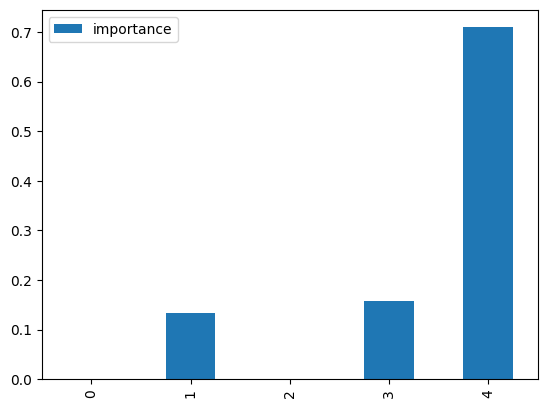

In [84]:
importances.plot.bar()

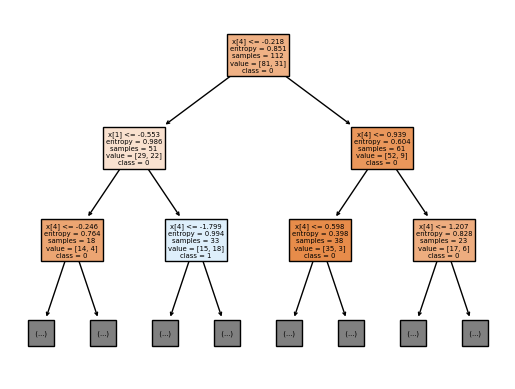

In [89]:
# Plot the tree diagram
from sklearn import tree
tree.plot_tree(model[2], max_depth=2, class_names=['0', '1'], filled=True);

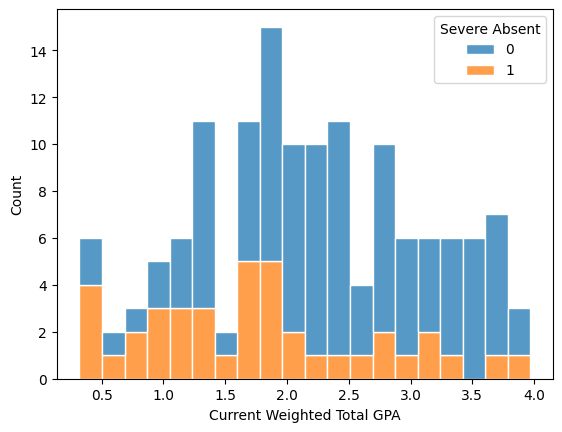

In [43]:
sns.histplot(data=absence, x="Current Weighted Total GPA", hue ='Severe Absent', multiple='stack', edgecolor="white", bins=20);

##Part 2: Intervention Proposal

In [66]:
# Logistic Regression
print(model[0].coef_)
print(model[0].intercept_)

[[ 0.         -0.04536637  0.         -0.45830435 -0.59992498]]
[-1.0611227]


In [126]:
# Filter for students with attendence rate > 90% and < 95%
at_risk = students.loc[(students['Average Att Rate'] > 0.90)]
# Sort based on average att rate
at_risk = at_risk.sort_values(by=['Average Att Rate'])
at_risk.head()

,ID,Days Enr SY21_22,Days Present SY21_22,Days Abs SY21_22,Att Rate\n SY21_22,AttGrp\n SY21_22,Days Enr SY22_23,Days Present SY22_23,Days Abs SY22_23,Att Rate\n SY22_23,...,Current Weighted Total GPA,ZipResidence,Contact Person 1 (Primary Contact),Contact Email 1 (Email of Contact Person 1),Contact Number 1 (Phone Number of Contact Person 1),Contact Person 2 (Secondary Contact),Contact Email 2 (Email of Contact Person 2),Contact Number 2 (Phone Number of Contact Person 2),Average Att Rate,Severe Absent
125,430622,180,163,17,0.906,At Risk,NaN,NaN,NaN,NaN,...,2.80,94609,YES,YES,YES,YES,YES,YES,0.906000,0
5,281058,180,162,18,0.900,At Risk,180.0,166.0,14.0,0.922,...,2.80,94607,YES,NO,YES,YES,NO,YES,0.907333,0
114,408836,180,165,15,0.917,At Risk,180.0,160.0,20.0,0.889,...,1.41,94607,YES,YES,NO,YES,NO,YES,0.907667,0
54,376711,180,165,15,0.917,At Risk,180.0,161.0,19.0,0.894,...,2.06,94608,YES,YES,YES,YES,YES,YES,0.909333,0
43,374491,166,150,16,0.904,At Risk,163.0,150.0,13.0,0.920,...,1.94,94607,YES,NO,NO,YES,YES,YES,0.909333,0


In [127]:
at_risk.shape

(42, 34)

In [128]:
# Calculate the Averall Attendence Rate of the school
overall_att_rate = students['Average Att Rate'].mean()
overall_att_rate

0.8248666666666667

In [129]:
# Filter students whose Current Weighted Total GPA is less than 2.0
at_risk = at_risk.loc[at_risk['Current Weighted Total GPA'] < 2.0]
at_risk.head()

,ID,Days Enr SY21_22,Days Present SY21_22,Days Abs SY21_22,Att Rate\n SY21_22,AttGrp\n SY21_22,Days Enr SY22_23,Days Present SY22_23,Days Abs SY22_23,Att Rate\n SY22_23,...,Current Weighted Total GPA,ZipResidence,Contact Person 1 (Primary Contact),Contact Email 1 (Email of Contact Person 1),Contact Number 1 (Phone Number of Contact Person 1),Contact Person 2 (Secondary Contact),Contact Email 2 (Email of Contact Person 2),Contact Number 2 (Phone Number of Contact Person 2),Average Att Rate,Severe Absent
114,408836,180,165,15,0.917,At Risk,180.0,160.0,20.0,0.889,...,1.41,94607,YES,YES,NO,YES,NO,YES,0.907667,0
43,374491,166,150,16,0.904,At Risk,163.0,150.0,13.0,0.920,...,1.94,94607,YES,NO,NO,YES,YES,YES,0.909333,0
47,375373,173,158,15,0.913,At Risk,NaN,NaN,NaN,NaN,...,0.48,94607,YES,NO,NO,YES,YES,NO,0.913000,0
44,374493,166,152,14,0.916,At Risk,180.0,164.0,16.0,0.911,...,1.69,94607,YES,YES,YES,YES,NO,NO,0.914333,0
103,398448,180,166,14,0.922,At Risk,173.0,157.0,16.0,0.908,...,1.90,94612,YES,NO,NO,YES,YES,YES,0.917333,0


In [130]:
at_risk.shape

(13, 34)

In [132]:
at_risk['ID'].tolist()

[408836,
 374491,
 375373,
 374493,
 398448,
 283885,
 380978,
 373078,
 380998,
 382817,
 397328,
 379573,
 392658]

In [133]:
# Assume we can increase each student's days present in a term by a month
# Calculate the number of students needed to increase the overall attendence rate by 6%
additional_days = 0.06 * 180 * 140
additional_days

1511.9999999999998

In [134]:
num_of_student_above_90 = 42
1512/42

36.0